# Tables 05 / 06 / 07
T-CARS direct normal irradiance with aerosol (DNIaer) and without aerosol (DNIpri) compared to DWD observations (DNIobs).Correlations are shown for R(DNIobs,DNIaer)and R−pri(DNIobs−DNIpri,DNIaer−DNIpri). As skill test the difference of the left and right side of Eq. (6) is calculated (∆σall).


In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import configparser

import modules.load_data as ld
from modules.modules_Table_04_05_06 import *


# load DWD metadata
stations = ld.dwd_stations()

# define timeframe
days = pd.date_range("2015-01-01","2015-12-31")

# load dataset ( calculated by make_dataset_ecrad_skill.py )
config = configparser.ConfigParser()
config.read("ConfigFile.ini")
pf = config['PATHS']['datasets']
dataset_fname = os.path.join(pf,"ecrad_dwd_skill.nc")

dsy = xr.open_dataset(dataset_fname)
    
# drop Zugspitze
dsy = dsy.where(dsy.name!='ZG',drop=True)
stations = stations.where(stations.station !='ZG',drop=True)

### print Tables

## DNI
metrics_table('DNI',stations,dsy)

print()
## GHI
metrics_table('GHI',stations,dsy,difdir=True)

print()
## DHI
metrics_table('DHI',stations,dsy)

########## Metrics Table DNI #########
selection & N & $\overline{\mathrm{DNI}}_\mathrm{clr}$ & $\overline{\mathrm{DNI}}_\mathrm{obs}$ & $\overline{\mathrm{DNI}}_\mathrm{aer}$ & RMSE & MBE & R &R$_\mathrm{-clr}$ &$\Delta\!\sigma_\mathrm{all}$ \\
\middlehline
MAM & 17153 & 830 & 685 & 711 & 62 & 26 & 0.973 & 0.744 & 27.54 \\
JJA & 59116 & 838 & 721 & 714 & 52 & -6 & 0.972 & 0.755 & 25.75 \\
SON & 16953 & 811 & 703 & 743 & 69 & 40 & 0.961 & 0.618 & 14.15 \\
DJF & 9870 & 817 & 683 & 736 & 90 & 53 & 0.952 & 0.619 & 19.73 \\
\middlehline
shore ($\sim$) & 25415 & 858 & 763 & 762 & 45 & -1 & 0.977 & 0.782 & 26.16 \\
mountain ($\wedge$) & 27997 & 862 & 751 & 757 & 58 & 5 & 0.958 & 0.676 & 14.84 \\
north (n) & 43945 & 829 & 716 & 719 & 53 & 3 & 0.972 & 0.749 & 25.51 \\
south (s) & 46699 & 838 & 717 & 733 & 57 & 16 & 0.966 & 0.689 & 15.90 \\
Cfb & 48299 & 827 & 713 & 723 & 51 & 10 & 0.976 & 0.752 & 24.34 \\
Dfb & 53762 & 833 & 703 & 718 & 69 & 15 & 0.949 & 0.629 & 15.93 \\
\middlehline
all & 103

Text(0, 0.5, 'Irradiance [Wm-2]')

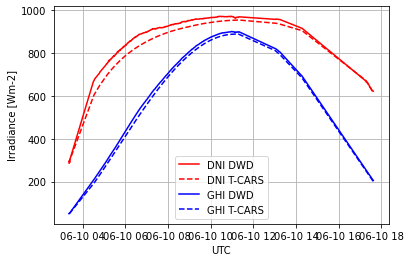

In [2]:
## plot observed and T-CARS irradiance

import matplotlib.pyplot as plt

# select station Arkona, date: 10-06-2015
ds = sel(dsy,st='AK',seas=None,tag=None,sza=90.)
ds = ds.swap_dims({'col':'time'}).sel(time='2015-06-10')
plt.plot(ds.time,ds.dni_obs,'r',label='DNI DWD')
plt.plot(ds.time,ds.dni_aer,'r--',label='DNI T-CARS')
plt.plot(ds.time,ds.glo_obs,'b',label='GHI DWD')
plt.plot(ds.time,ds.glo_aer,'b--',label='GHI T-CARS')
plt.legend()
plt.grid(True)
plt.xlabel('UTC')
plt.ylabel('Irradiance [Wm-2]')
